# Crédito Joven  Nafin analysis 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data_CreditoJoven.csv",  sep=';', encoding='cp1252')

In [5]:
df.head()

,Año,Mes,Productos,Clave Estado,Estado,Importe de los creditos,Numero de Creditos,Numero de Beneficiados
0,2016,2,1.- TU CREDITO PARA CRECER,1014000,JALISCO,60000.0,1,1
1,2017,11,2.- TU CREDITO PYME JOVEN,1007000,CHIAPAS,4500000.0,2,2
2,2016,7,2.- TU CREDITO PYME JOVEN,1011000,GUANAJUATO,2903000.0,4,4
3,2015,8,1.- TU CREDITO PARA CRECER,1007000,CHIAPAS,236000.0,1,1
4,2016,7,2.- TU CREDITO PYME JOVEN,1004000,CAMPECHE,2500000.0,1,1


# Basic statistics over the credit column  

In [6]:
df.loc[:,['Importe de los creditos']].describe()

,Importe de los creditos
count,1.478000e+03
mean,1.314402e+06
std,2.189663e+06
min,2.500000e+04
25%,2.132500e+05
50%,4.630000e+05
75%,1.465000e+06
max,2.007643e+07


In [7]:
# Maximun credit 
df['Importe de los creditos'].max()

20076428.57

In [8]:
df.loc[df['Importe de los creditos'] == df['Importe de los creditos'].max()]

,Año,Mes,Productos,Clave Estado,Estado,Importe de los creditos,Numero de Creditos,Numero de Beneficiados
1422,2017,11,2.- TU CREDITO PYME JOVEN,1021000,PUEBLA,20076428.57,14,14


In [9]:
# Minimum credit
df['Importe de los creditos'].min()

25000.0

In [10]:
df.loc[df['Importe de los creditos'] == df['Importe de los creditos'].min()]

,Año,Mes,Productos,Clave Estado,Estado,Importe de los creditos,Numero de Creditos,Numero de Beneficiados
164,2015,9,1.- TU CREDITO PARA CRECER,1015000,MEXICO,25000.0,1,1


# Credits given

In [27]:
# Products
products_group = df.groupby(['Productos'])['Numero de Creditos'].sum()
products_group

Productos
1.- TU CREDITO PARA CRECER     434
2.- TU CREDITO PYME JOVEN     1737
3.- INCUBACION EN LINEA       2895
4.- INCUBACION PRESENCIAL       64
Name: Numero de Creditos, dtype: int64

Text(0.5,1,'Créditos otorgados por Producto')

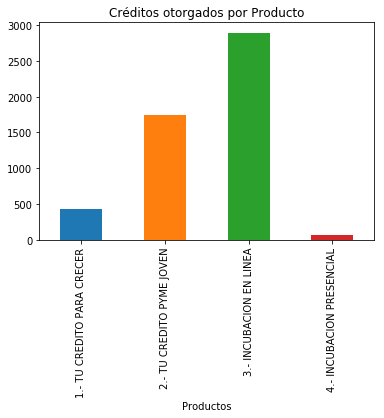

In [43]:
products_group.plot(kind ='bar')
plt.title('Créditos otorgados por Producto')

In [34]:
# Credits by State
state_group = df.groupby(['Estado'])['Numero de Creditos'].sum()
state_group

Estado
AGUASCALIENTES           102
BAJA CALIFORNIA NORTE    131
BAJA CALIFORNIA SUR       98
CAMPECHE                 251
CHIAPAS                   76
CHIHUAHUA                149
CIUDAD DE MEXICO         272
COAHUILA                 257
COLIMA                    34
DURANGO                  125
GUANAJUATO               152
GUERRERO                 139
HIDALGO                  239
JALISCO                  270
MEXICO                   358
MICHOACAN                222
MORELOS                   81
NAYARIT                  174
NUEVO LEON               293
OAXACA                   141
PUEBLA                   275
QUERETARO                144
QUINTANA ROO              46
SAN LUIS POTOSI           98
SINALOA                  404
SONORA                   106
TABASCO                   46
TAMAULIPAS               115
TLAXCALA                 101
VERACRUZ                 126
YUCATAN                   92
ZACATECAS                 13
Name: Numero de Creditos, dtype: int64

# Credits given by State

Text(0.5,1,'Créditos otorgados por Estado')

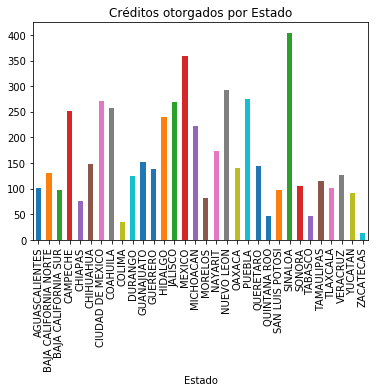

In [42]:
state_group.plot(kind='bar')
plt.title('Créditos otorgados por Estado')

# Data checking for credits given  

In [36]:
print("Credit Numbers by Products: ", products_group.sum())
print("Credit Numbers by State: ", state_group.sum())

Credit Numbers by Products:  5130
Credit Numbers by State:  5130


# Credits value by State

In [45]:
credit_group = df.groupby(['Estado'])['Importe de los creditos'].sum()

Text(0.5,1,'Importe de créditos por Estado')

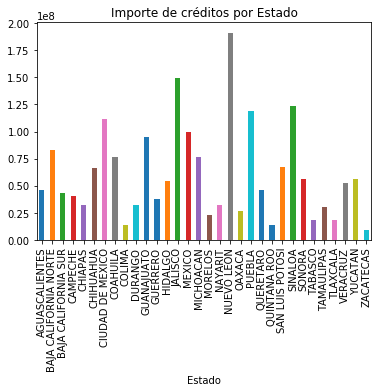

In [47]:
credit_group.plot(kind='bar')
plt.title('Importe de créditos por Estado')

In [50]:
print("Total credit value: ", df['Importe de los creditos'].sum())
print("Total credit group by state: ", credit_group.sum())

Total credit value:  1942686185.3
Total credit group by state:  1942686185.3000002


# Credits by year

In [55]:
credit_number_year = df.groupby(['Año'])['Numero de Creditos'].sum()

Text(0.5,1,'Número de créditos por año')

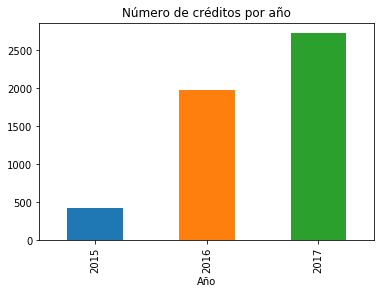

In [59]:
credit_number_year.plot(kind='bar')
plt.title('Número de créditos por año')

In [57]:
credit_credit_value = df.groupby(['Año'])['Importe de los creditos'].sum()

Text(0.5,1,'Importe de créditos por año')

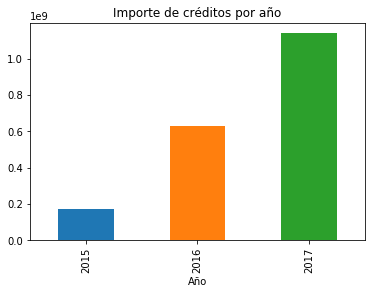

In [60]:
credit_credit_value.plot(kind='bar')
plt.title('Importe de créditos por año')

# Credits by year

In [79]:
year_2017 = df[df['Año'] == 2017].groupby(['Productos'])['Numero de Creditos'].sum()

In [80]:
year_2016 = df[df['Año'] == 2016].groupby(['Productos'])['Numero de Creditos'].sum()

In [81]:
year_2015 = df[df['Año'] == 2015].groupby(['Productos'])['Numero de Creditos'].sum()

In [91]:
dict_years = {'2017': year_2017, '2016': year_2016, '2015': year_2015}

In [93]:
df2 = pd.DataFrame(dict_years)

In [94]:
df2.head()

,2015,2016,2017
Productos,,,
1.- TU CREDITO PARA CRECER,101,187,146
2.- TU CREDITO PYME JOVEN,205,607,925
3.- INCUBACION EN LINEA,113,1161,1621
4.- INCUBACION PRESENCIAL,5,28,31


Text(0.5,1,'Créditos otorgados por año')

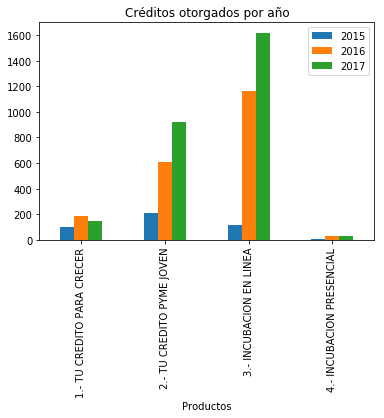

In [97]:
df2.plot(kind='bar')
plt.title('Créditos otorgados por año')

# Credits value by year

In [98]:
value_2017 = df[df['Año'] == 2017].groupby(['Productos'])['Importe de los creditos'].sum()

In [100]:
value_2016 = df[df['Año'] == 2016].groupby(['Productos'])['Importe de los creditos'].sum()

In [101]:
value_2015 = df[df['Año'] == 2015].groupby(['Productos'])['Importe de los creditos'].sum()

In [102]:
value_years = {'2017': value_2017, '2016': value_2016, '2015': value_2015}

In [103]:
df3 = pd.DataFrame(value_years)

In [104]:
df3.head()

,2015,2016,2017
Productos,,,
1.- TU CREDITO PARA CRECER,1.740192e+07,3.076867e+07,2.882717e+07
2.- TU CREDITO PYME JOVEN,1.376964e+08,4.302108e+08,8.695358e+08
3.- INCUBACION EN LINEA,1.542600e+07,1.590866e+08,2.304585e+08
4.- INCUBACION PRESENCIAL,1.647822e+06,1.057707e+07,1.104935e+07


Text(0.5,1,'Importe de créditos por año')

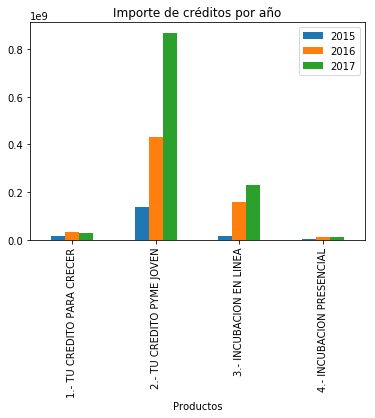

In [105]:
df3.plot(kind='bar')
plt.title("Importe de créditos por año")